<a href="https://colab.research.google.com/github/ezrabrilliant/pdds/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/netflix_movies_detailed_up_to_2025.csv')
print(df.columns)
print(df.head())

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue'],
      dtype='object')
   show_id   type                                         title  \
0    10192  Movie                           Shrek Forever After   
1    27205  Movie                                     Inception   
2    12444  Movie  Harry Potter and the Deathly Hallows: Part 1   
3    38757  Movie                                       Tangled   
4    10191  Movie                      How to Train Your Dragon   

                      director  \
0                Mike Mitchell   
1            Christopher Nolan   
2                  David Yates   
3   Byron Howard, Nathan Greno   
4  Chris Sanders, Dean DeBlois   

                                                cast  \
0  Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...   
1  Leonardo DiCa

              popularity  vote_average   revenue
popularity      1.000000      0.071178  0.216282
vote_average    0.071178      1.000000  0.117231
revenue         0.216282      0.117231  1.000000


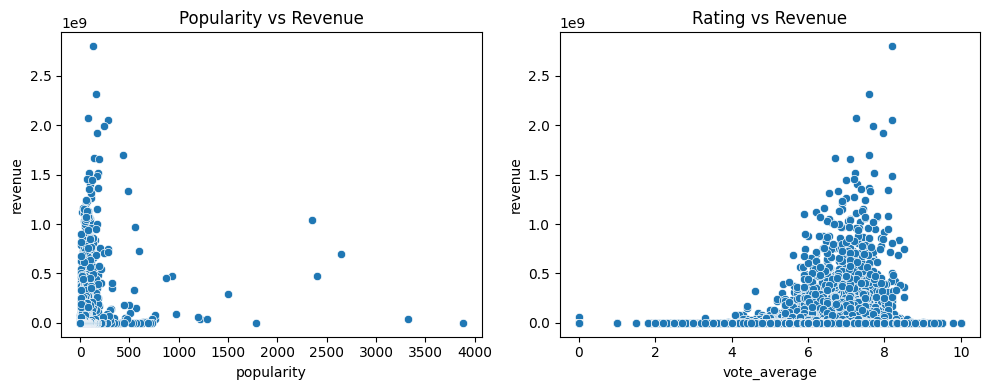

In [ ]:
# Analysis of popularity, rating impact on revenue
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df[['popularity', 'vote_average', 'revenue']].corr()
print(corr_df)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='popularity', y='revenue')
plt.title('Popularity vs Revenue')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='vote_average', y='revenue')
plt.title('Rating vs Revenue')

plt.tight_layout()
plt.show()

In [ ]:
# Compute average revenue per genre
import pandas as pd

df_genres = df[['genres', 'revenue']].dropna()

df_genres['genres_list'] = df_genres['genres'].str.split(', ')
df_exploded = df_genres.explode('genres_list')

genre_revenue = df_exploded.groupby('genres_list')['revenue'].mean().reset_index()
genre_revenue_sorted = genre_revenue.sort_values(by='revenue', ascending=False).head(10)
print(genre_revenue_sorted)

        genres_list       revenue
1         Adventure  1.089478e+08
14  Science Fiction  6.800073e+07
8           Fantasy  5.853858e+07
7            Family  5.771262e+07
0            Action  5.672482e+07
2         Animation  4.709192e+07
17              War  2.811741e+07
3            Comedy  2.762601e+07
9           History  2.337902e+07
4             Crime  2.234329e+07


In [ ]:
# Favorite genre by year: most common genre per release_year
import pandas as pd

df_year = df[['release_year', 'genres']].dropna()
df_year['genre_list'] = df_year['genres'].str.split(', ')
df_year_exploded = df_year.explode('genre_list')
counts = df_year_exploded.groupby(['release_year', 'genre_list']).size().reset_index(name='count')
# For each year, get top genre
top_genre_per_year = counts.loc[counts.groupby('release_year')['count'].idxmax()].reset_index(drop=True)
print(top_genre_per_year)

    release_year genre_list  count
0           2010      Drama    445
1           2011      Drama    449
2           2012      Drama    428
3           2013      Drama    446
4           2014      Drama    449
5           2015      Drama    471
6           2016      Drama    485
7           2017      Drama    455
8           2018      Drama    457
9           2019      Drama    422
10          2020      Drama    420
11          2021      Drama    424
12          2022      Drama    370
13          2023      Drama    411
14          2024      Drama    412
15          2025      Drama    366
